## Restart the kernel

In [38]:
#import os
#os._exit(00)

save = False

## Regular imports

In [39]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(6)

import matplotlib
import matplotlib.pyplot as plt
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15



In [40]:
import Util as U

plt.rcParams['figure.figsize'] = U.figsize

## Linear regression

In [204]:
a = 100
b = 1

X = 3 * np.random.rand(100, 1)
X[-5:,0] =[5,6,7,8,9]  

y = 2 + 2 * X+ np.random.randn(100, 1)

y[-5:,0] = [9,9.5,9.6,8.9,10] 

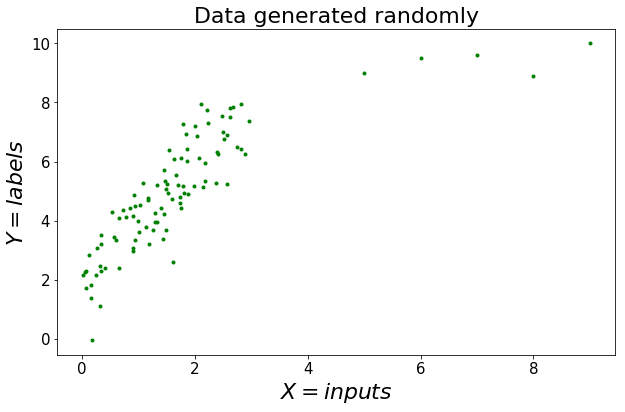

In [205]:
plt.figure(figsize=U.figsize)
plt.plot(X, y, "g.")
plt.xlabel("$X=inputs$", fontsize=22)
plt.ylabel("$Y=labels$", rotation=90, fontsize=22)
#plt.axis([0, 6, -1, 13])
plt.title("Data generated randomly", fontsize=22)
U.save_fig("generated_data_plot", save)
plt.show()

In [132]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 2.52499589],
       [ 1.20382082]])

In [133]:
X_new = np.array([[0], [5]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 2.52499589],
       [ 8.54409997]])

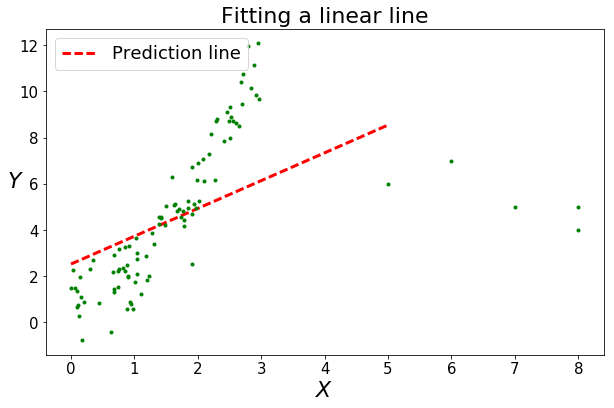

In [134]:
plt.figure(figsize=U.figsize)
plt.plot(X_new, y_predict, "r--",linewidth=3, label="Prediction line")
#plt.plot(X_new, lin_reg.predict(X_new))

plt.plot(X, y, "g.")
#plt.axis([0, 3, -1, 13])
plt.xlabel("$X$", fontsize=22)
plt.ylabel("$Y$", rotation=0, fontsize=22)
plt.title("Fitting a linear line", fontsize=22)
plt.legend(loc="upper left", fontsize=18)
U.save_fig("generated_data_plot_line",save)
plt.show()

In [135]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
#X_new = np.arange(0,10,1).reshape(-1,1)

(array([ 2.52499589]), array([[ 1.20382082]]))

## On learning
### batch gradient descent

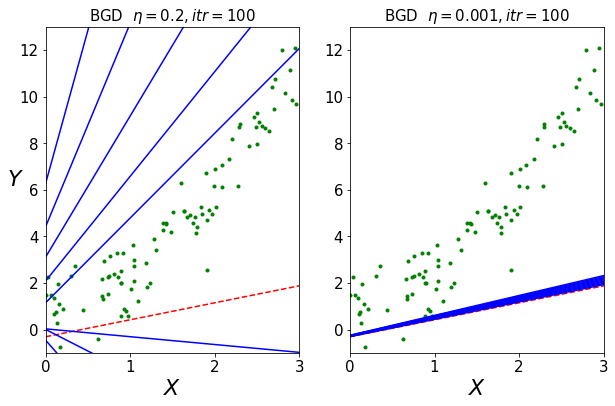

In [136]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, n_iterations, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "g.")
    
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$X$", fontsize=22)
    #plt.axis([0, 2, 0, 15])
    plt.axis([0, 3, -1, 13])
    plt.title(r"BGD  $\eta = {}, itr = {}$".format(eta,n_iterations), fontsize=15)

np.random.seed(6)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=U.figsize)
n_iterations = 100
#plt.title("Gradient descent", fontsize=22)
plt.subplot(121); 
plot_gradient_descent(theta, eta=0.2, n_iterations=n_iterations)


plt.ylabel("$Y$", rotation=0, fontsize=22)
plt.subplot(122); 
plot_gradient_descent(theta, eta=0.001, n_iterations=n_iterations, theta_path=theta_path_bgd)
#plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

U.save_fig("gradient_descent_plot_"+str(n_iterations), save)
plt.show()

## Other Optimizers

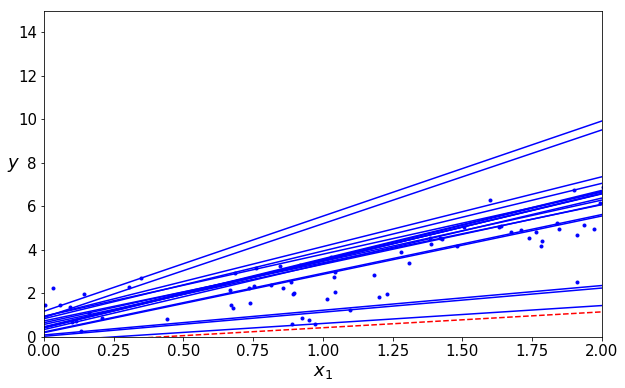

In [137]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(6)


n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        #eta = epoch * i
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
#save_fig("sgd_plot")                                 # not shown
plt.show()      
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)




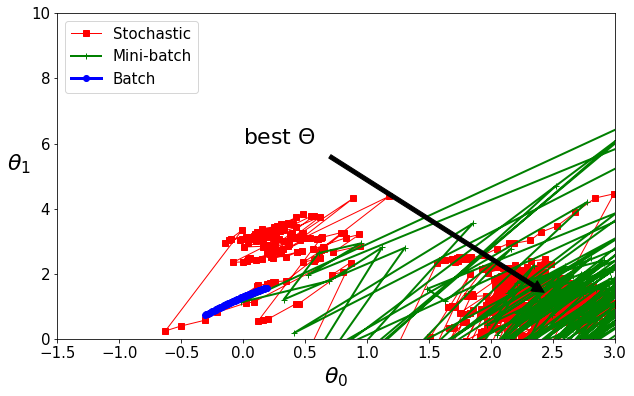

In [138]:
fig = plt.figure(figsize=U.figsize)
ax = fig.add_subplot(111)
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
#ax = fig.add_subplot(111)

ax.annotate('best $\Theta$', xy=(theta_best[0,0], theta_best[1,0]), xytext=(0, 6),
            arrowprops=dict(facecolor='black', shrink=0.05),fontsize=22
            )

plt.legend(loc="upper left", fontsize=15)
plt.xlabel(r"$\theta_0$", fontsize=22)
plt.ylabel(r"$\theta_1$   ", fontsize=22, rotation=0)
plt.axis([-1.5, 3, 0, 10])
U.save_fig("gradient_descent_paths_plot", save)
plt.show()

In [139]:
theta_best

array([[ 2.52499589],
       [ 1.20382082]])

In [140]:
theta_best[1,0]

1.2038208165017266

## Creating overfitting

In [209]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_new = np.linspace(0, 9, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, degree, **model_kargs):
    for alpha, style in zip(alphas, ("b-","r--")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}, degree= {}$".format(alpha,degree))
    plt.plot(X, y, "g.", linewidth=3)
    plt.legend(loc="lower right", fontsize=15)
    plt.xlabel("$X$", fontsize=22)
    plt.ylabel("$Y$", fontsize=22)
    #plt.axis([0, 3, 0, 4])

Saving figure lasso_regression_plot_All


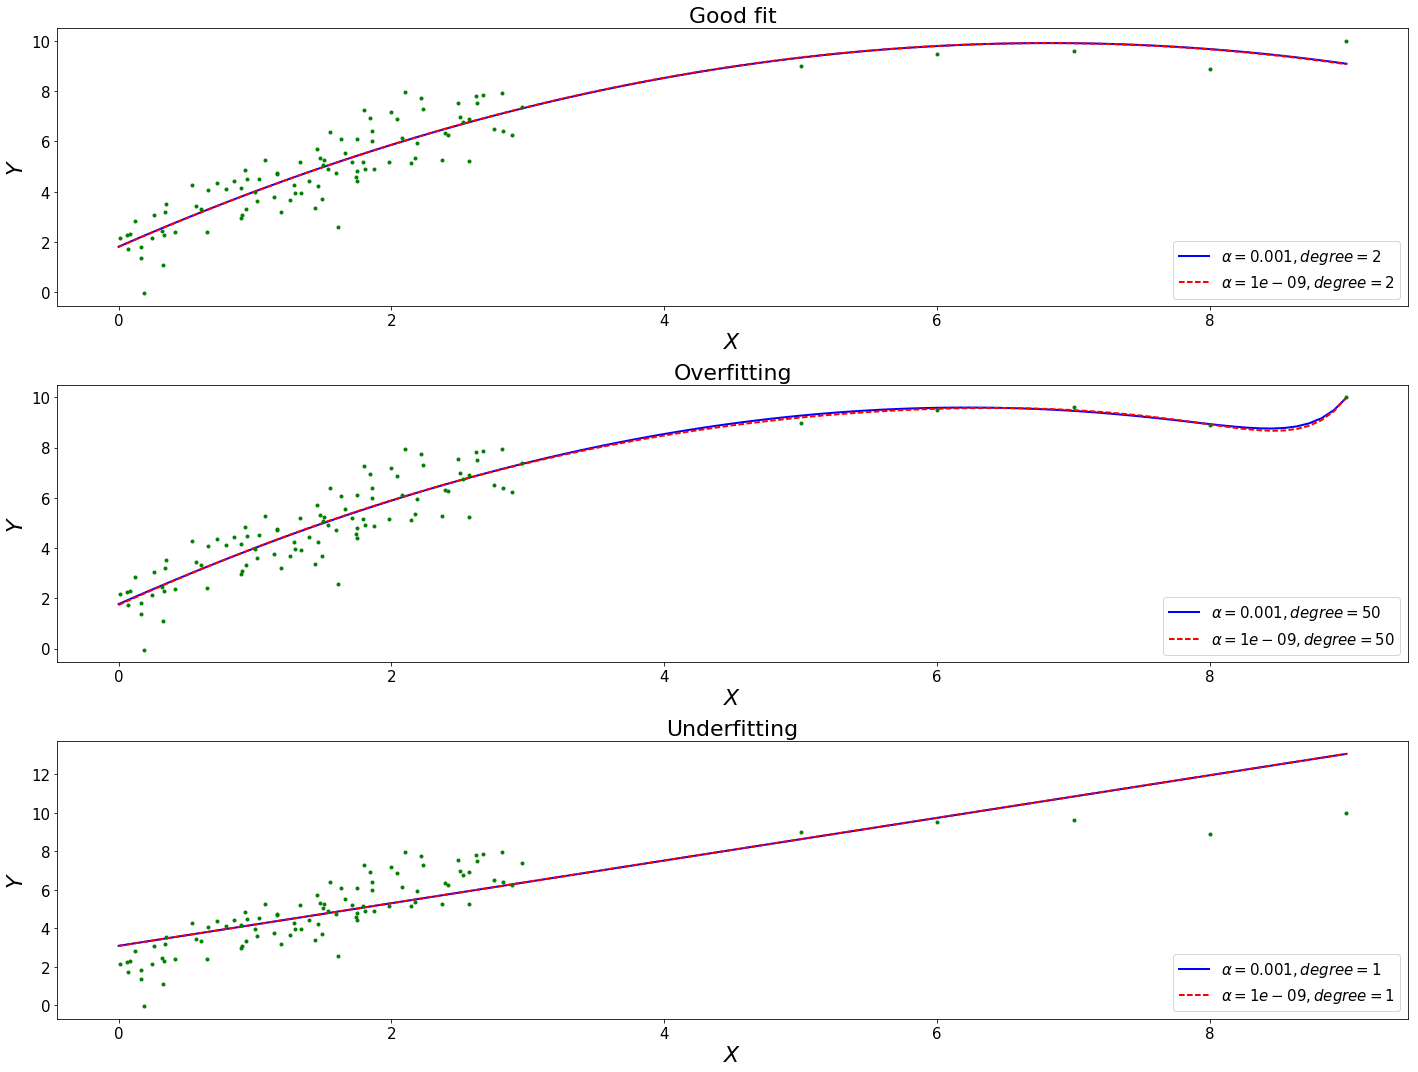

In [213]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures




poly_features = PolynomialFeatures()





X_poly = poly_features.fit_transform(X)



plt.figure(figsize=(20,15))
plt.subplot(311);
degree = 2
plt.title("Good fit", fontsize=22)
plot_model(Lasso, polynomial=True, alphas=(0.001,0.000000001), random_state=6, degree=degree)
plt.ylabel("$Y$", rotation=90, fontsize=22)

plt.subplot(312);
plt.title("Overfitting", fontsize=22)
degree = 50
plot_model(Lasso, polynomial=True, alphas=(0.001,0.000000001), random_state=6, degree=degree)
#plt.ylabel("$y$", rotation=90, fontsize=22)


plt.subplot(313);


degree = 1
plt.title("Underfitting", fontsize=22)
plot_model(Lasso, polynomial=False, alphas=(0.001,0.000000001), random_state=6, degree=degree)
#plt.ylabel("$y$", rotation=90, fontsize=22)


U.save_fig("lasso_regression_plot_All", save=True)
plt.show()